In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO



Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.8/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wN3QssC3r30pTYnwpLtX")
project = rf.workspace("saad-hc5xe").project("my-first-project-at6f9")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-1 in yolov8:: 100%|██████████| 766/766 [00:00<00:00, 6788.92it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/My-First-Project-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

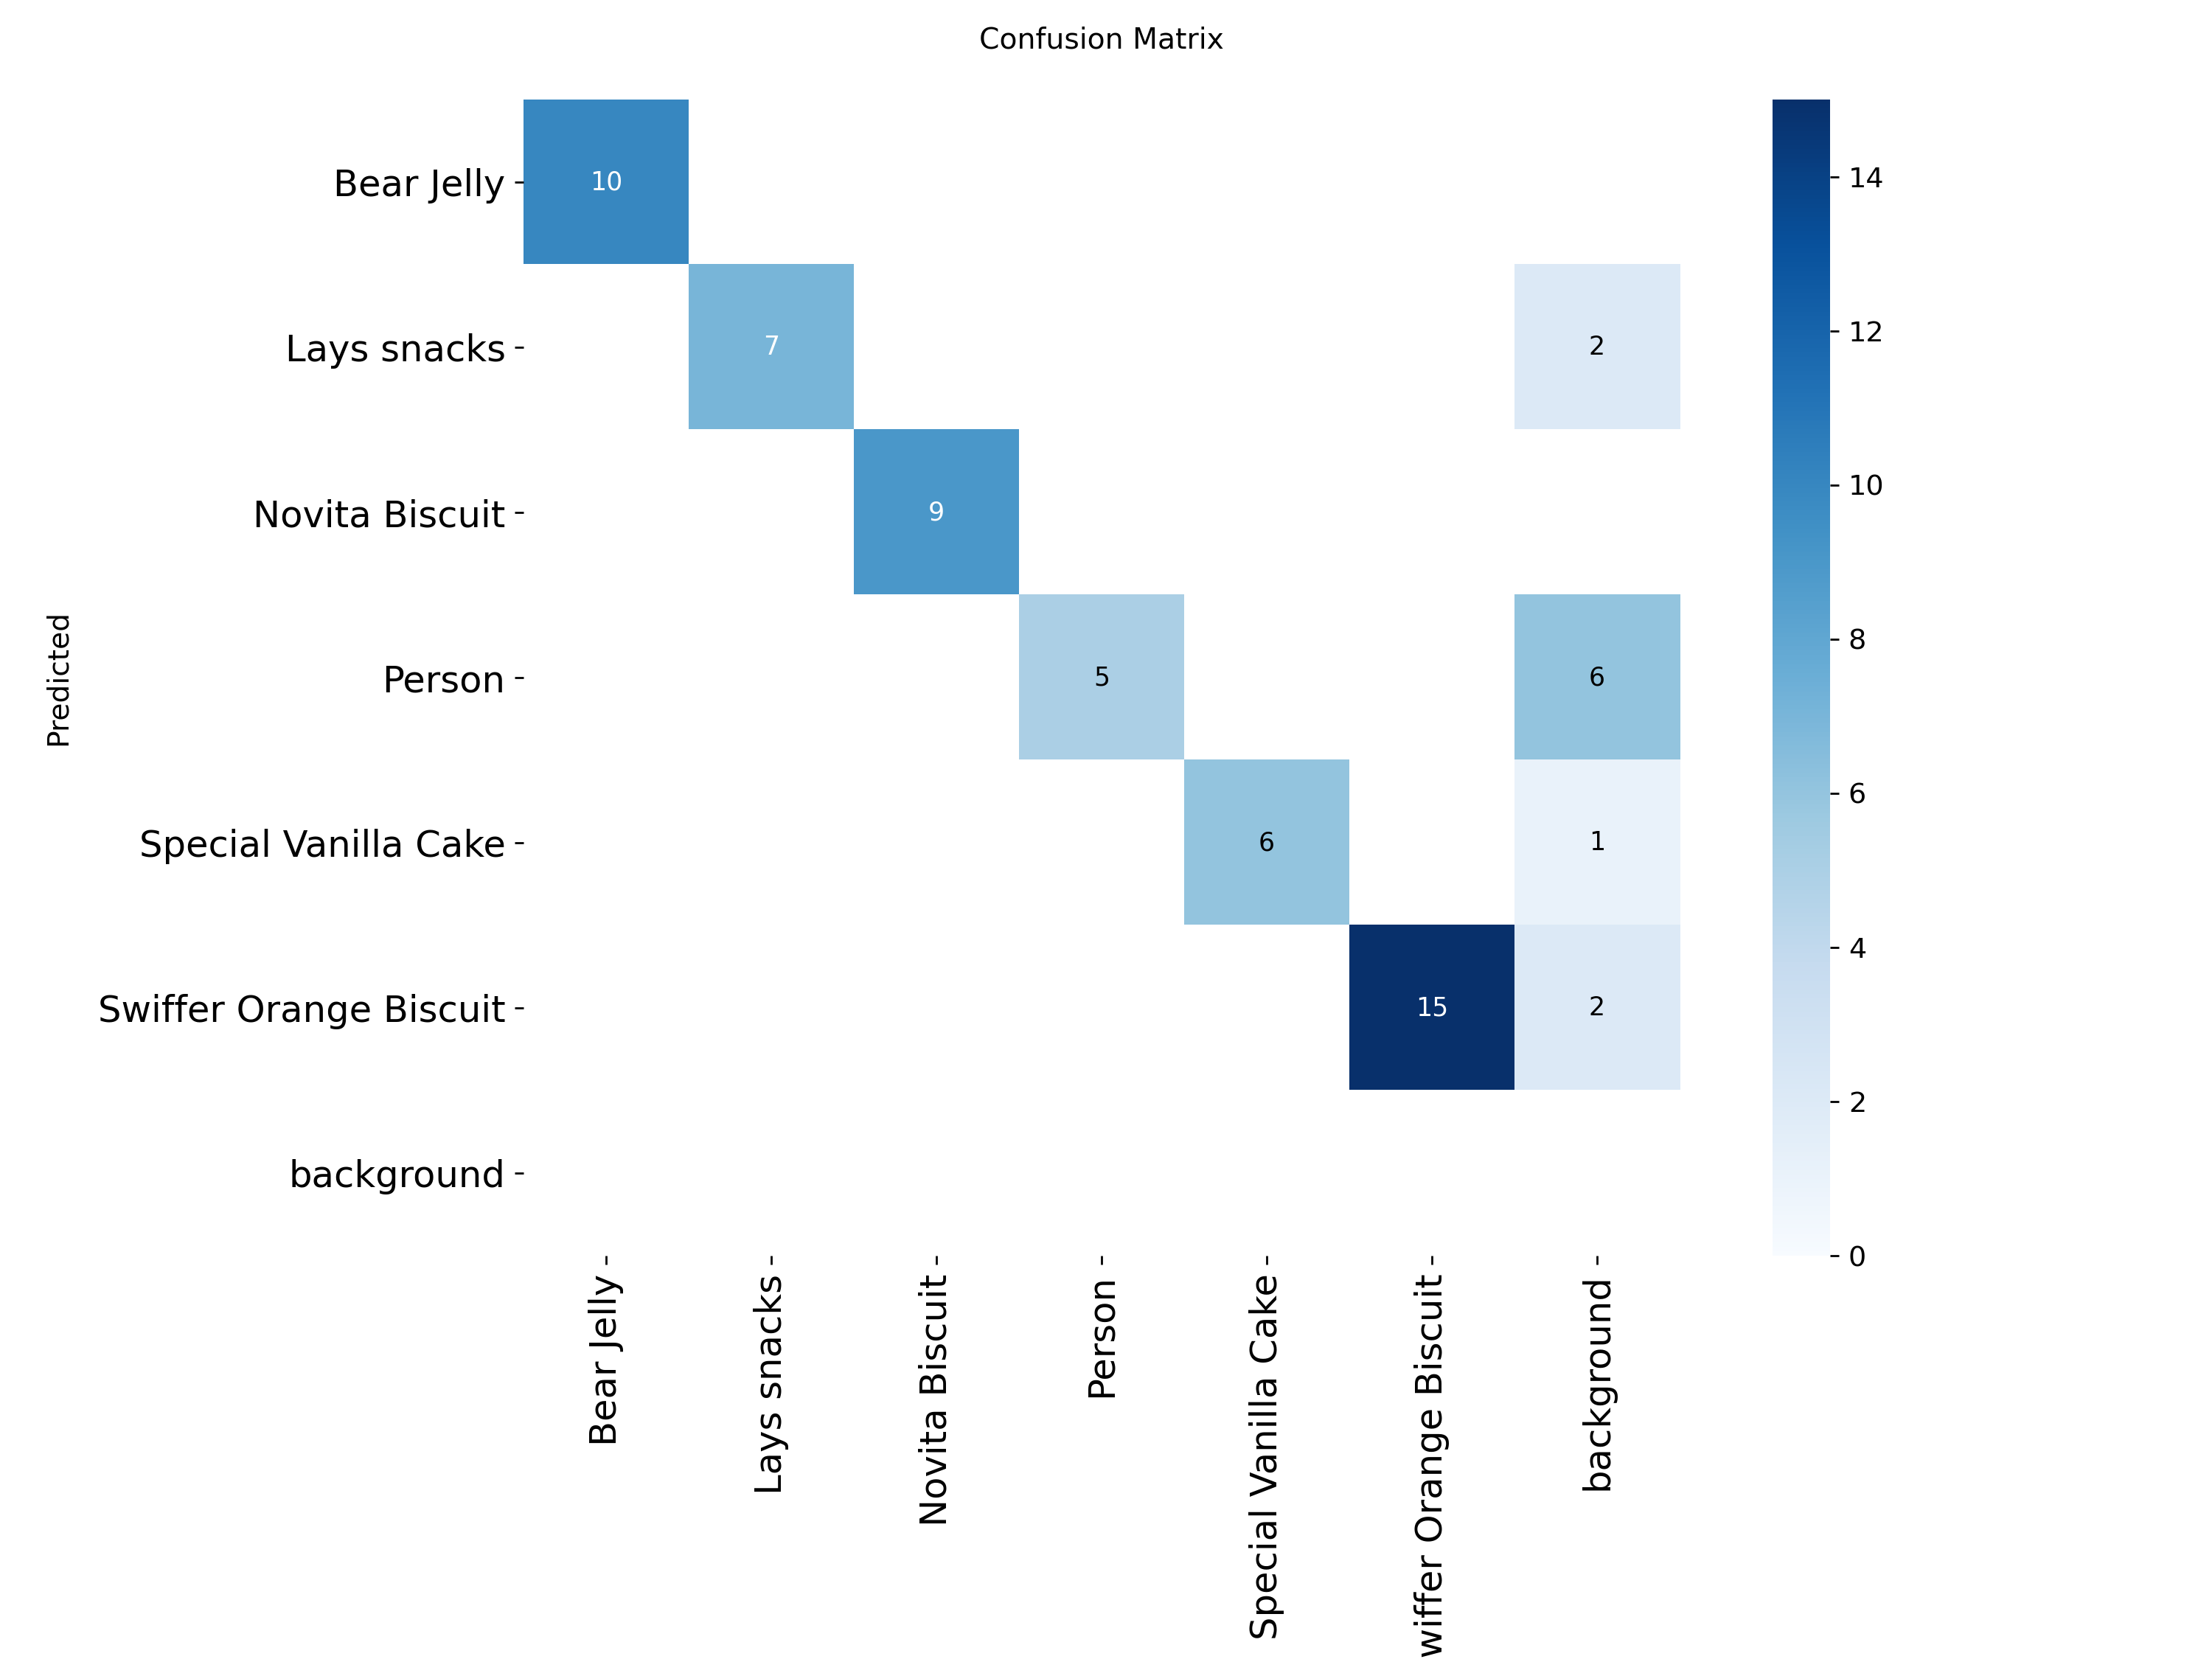

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

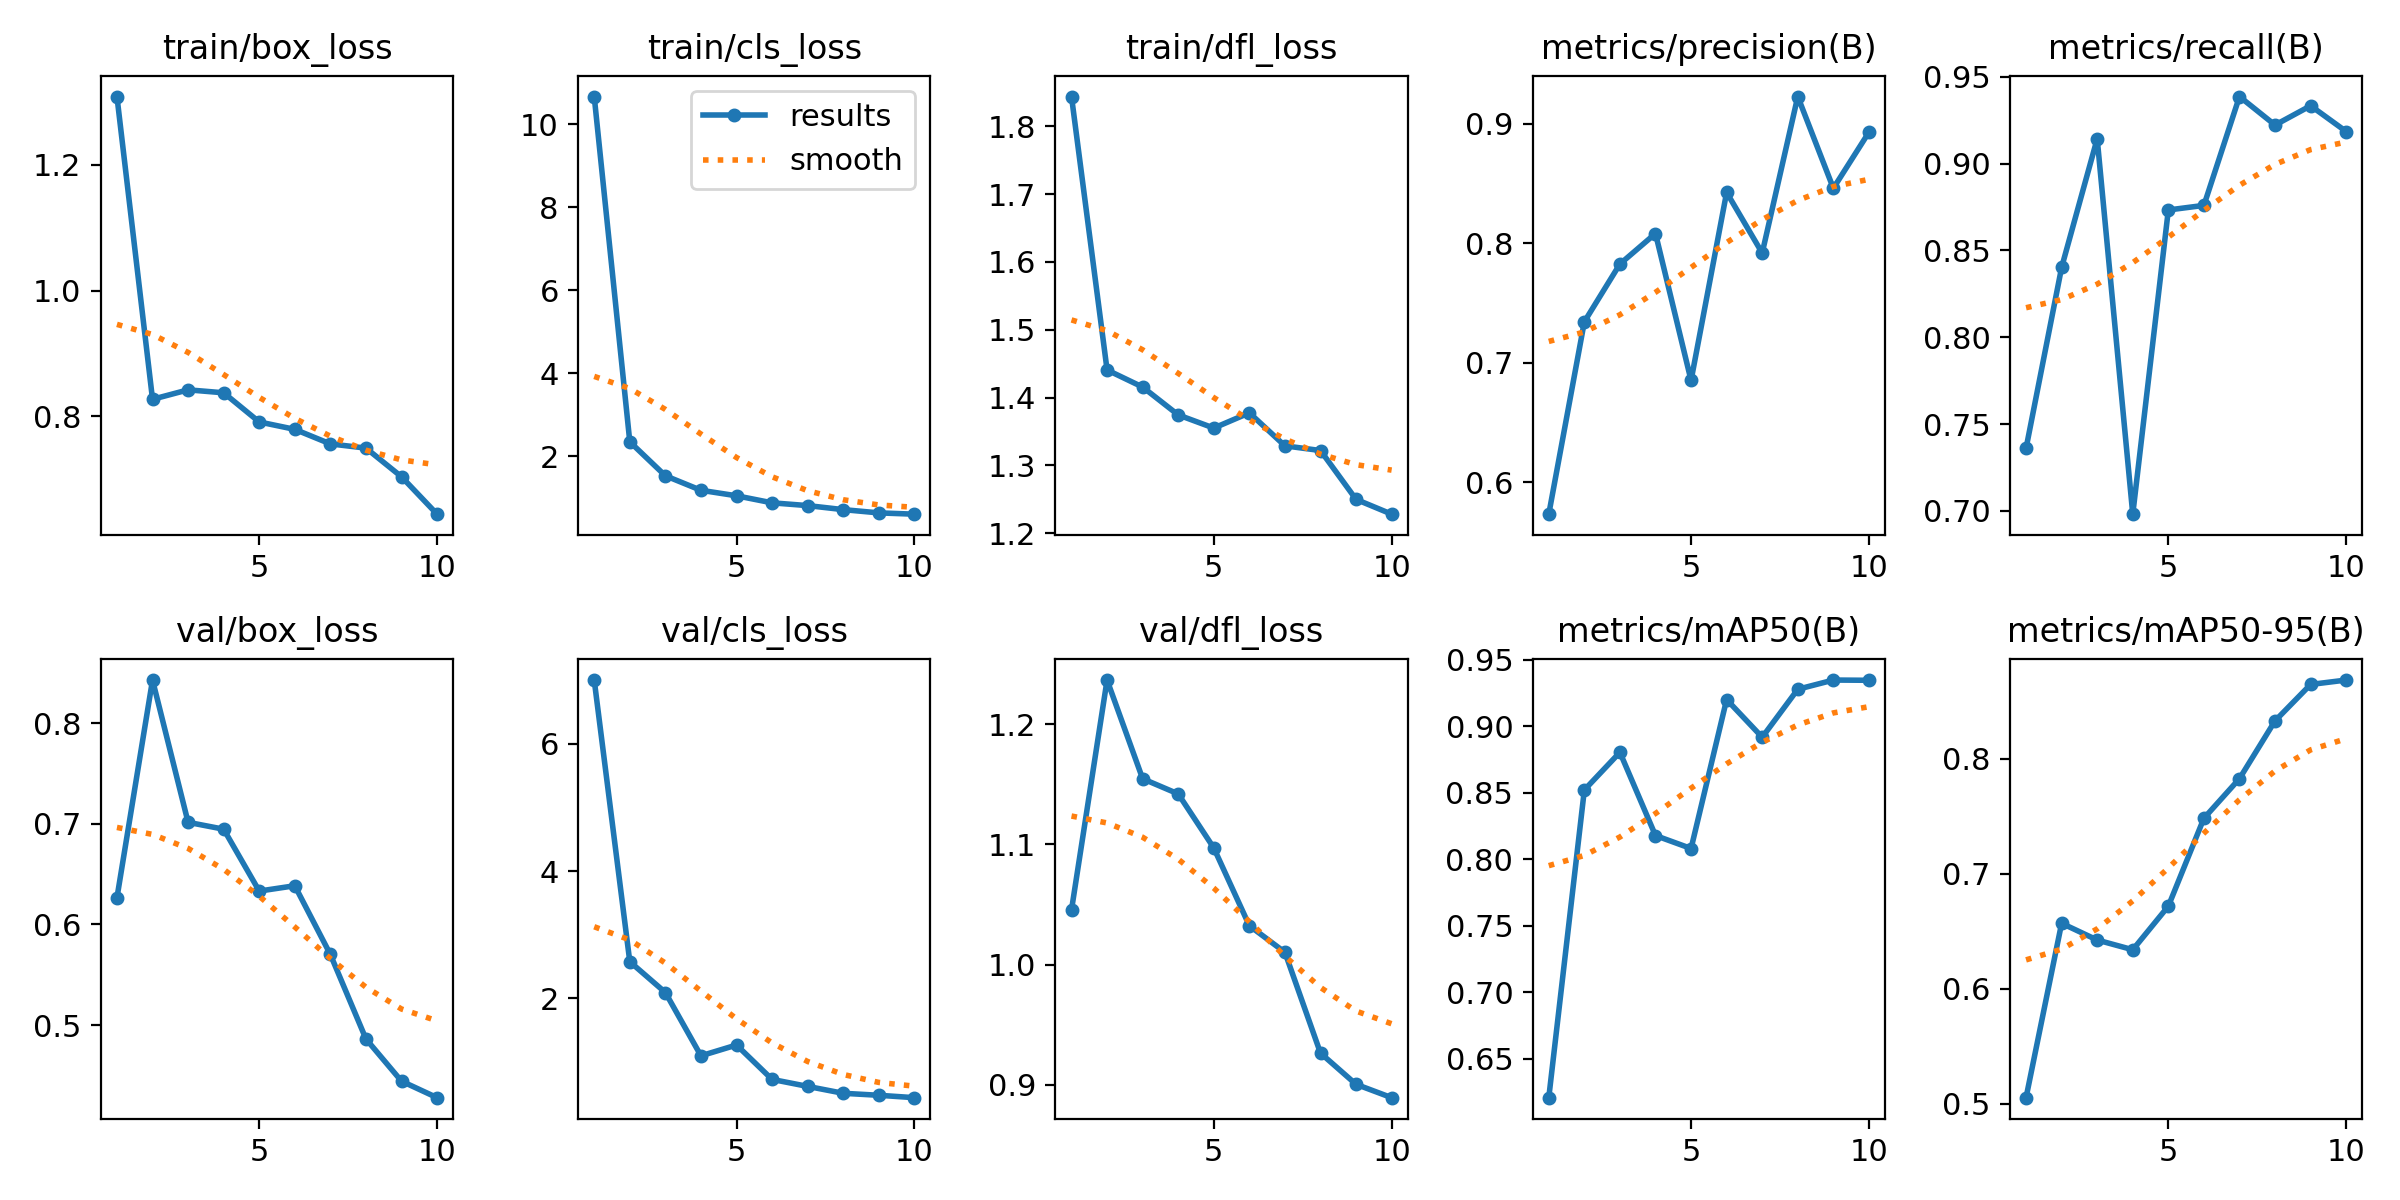

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

The losses are going down (model learning better).

The accuracy metrics (precision, recall, mAP) are going up (model detecting better).
💪 This means your YOLOv8 training went very well.

In [ ]:
!yolo task=detect mode=val model = /content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1572.2±789.4 MB/s, size: 52.4 KB)
val: Scanning /content/My-First-Project-1/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 45/45 681.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.8it/s 1.6s
                   all         45         52      0.893      0.919      0.932      0.869
            Bear Jelly         10         10      0.991          1      0.995      0.925
           Lays snacks          7          7      0.963          1      0.995      0.956
        Novita Biscuit          9          9      0.984          1      0.995      0.942
                Person          5          5      0.574        0.6      0.626      0.534
  Special Vanilla Cake          6       

In [ ]:
!yolo task=detect mode=predict model = /content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/22 /content/My-First-Project-1/test/images/WhatsApp-Image-2025-10-15-at-08_44_18_6e72c9ac_jpg.rf.1335f446779ad5d951d55d538c71be55.jpg: 640x640 1 Lays snacks, 16.3ms
image 2/22 /content/My-First-Project-1/test/images/aug_0_1819_jpg.rf.3c98a09d01b864fccc71b31ec55b8a06.jpg: 640x640 1 Lays snacks, 1 Person, 16.2ms
image 3/22 /content/My-First-Project-1/test/images/aug_0_1930_jpg.rf.ece7326f228a822e8aad827db0371182.jpg: 640x640 1 Lays snacks, 1 Person, 16.2ms
image 4/22 /content/My-First-Project-1/test/images/aug_0_2247_jpg.rf.efa8f3bd61ab5413308917e8f6bf0d7e.jpg: 640x640 1 Swiffer Orange Biscuit, 16.2ms
image 5/22 /content/My-First-Project-1/test/images/aug_0_2600_jpg.rf.b8d5b6a527ab61312bddc93089ce9178.jpg: 640x640 1 Lays snacks, 16.2ms
image 6/22 /content/My-First-Project-1/test/images/aug_0_3297_jpg.rf.0ee0f8fcd3b56

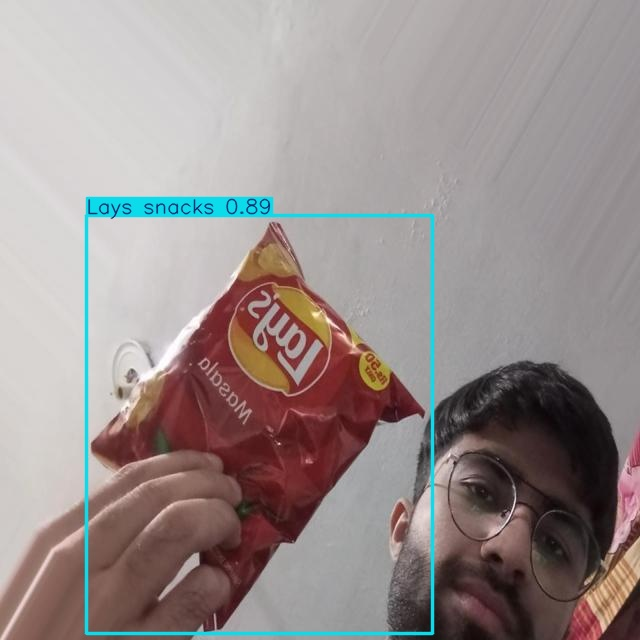

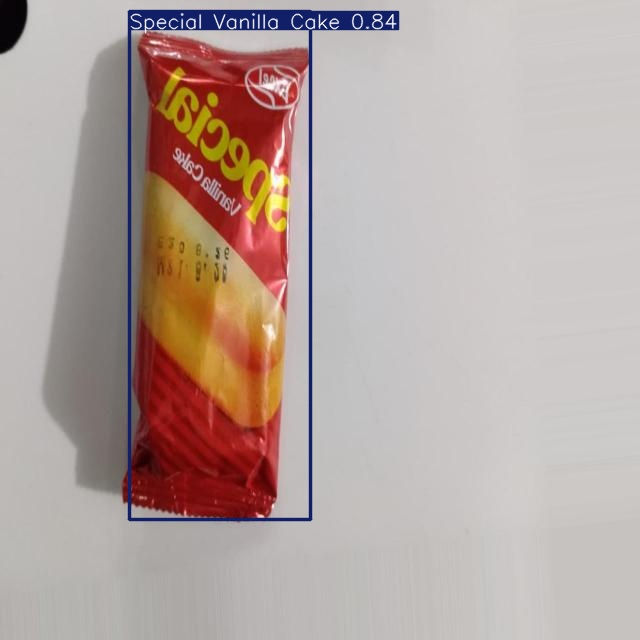

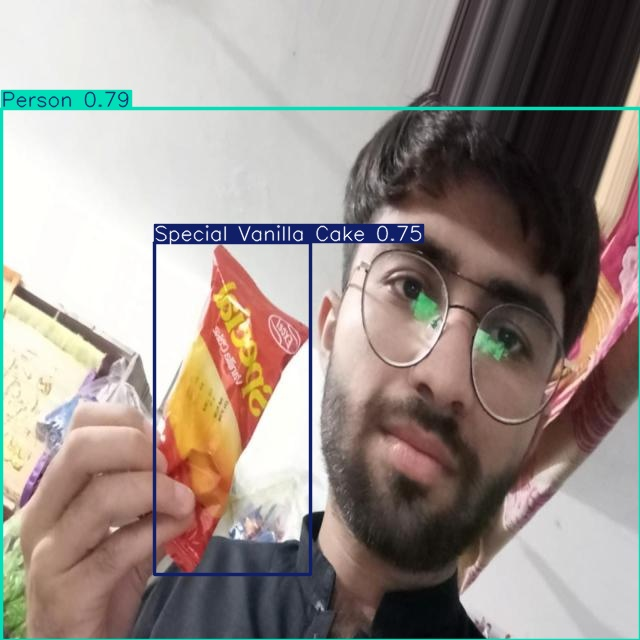

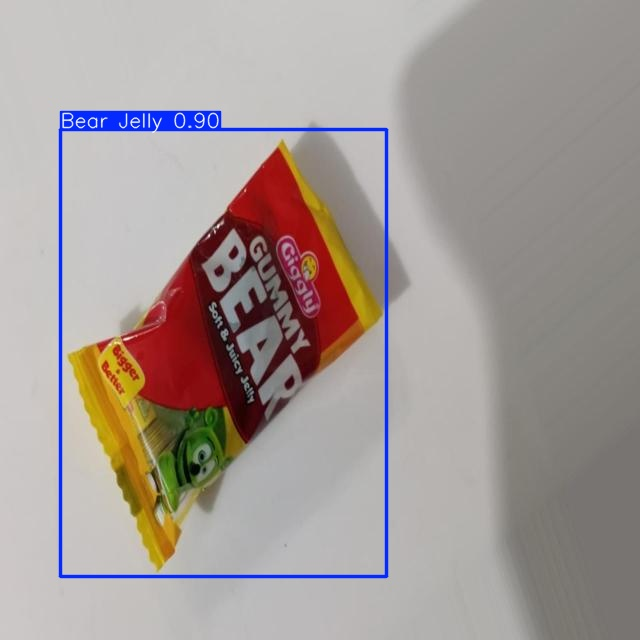

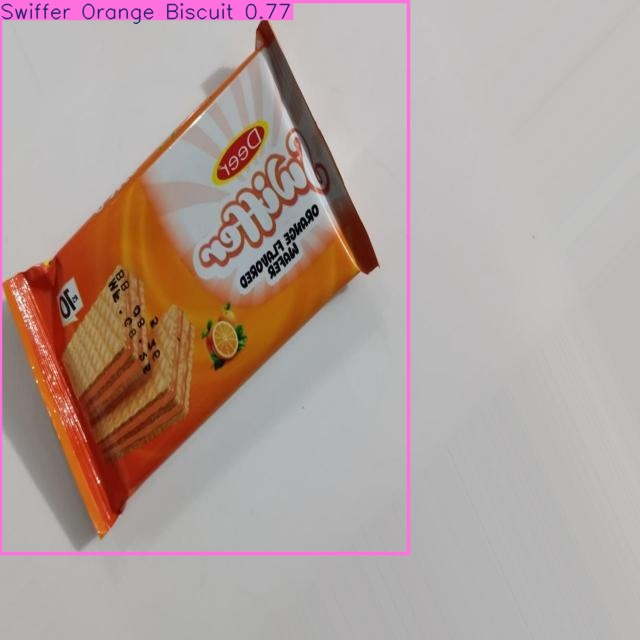

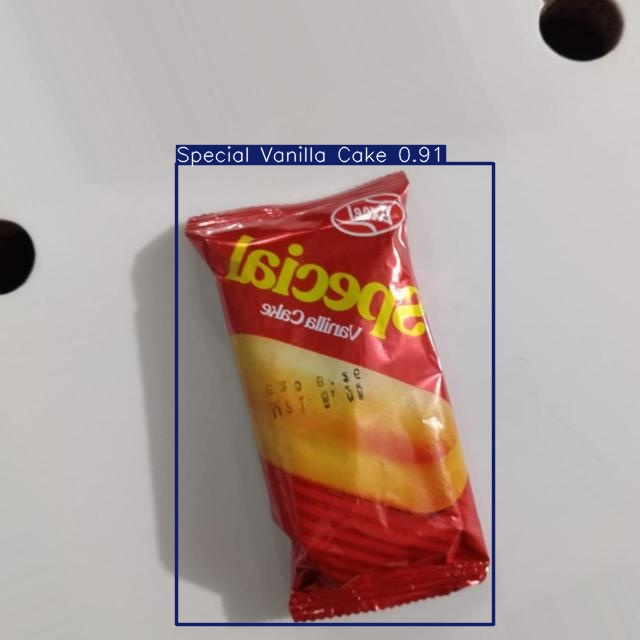

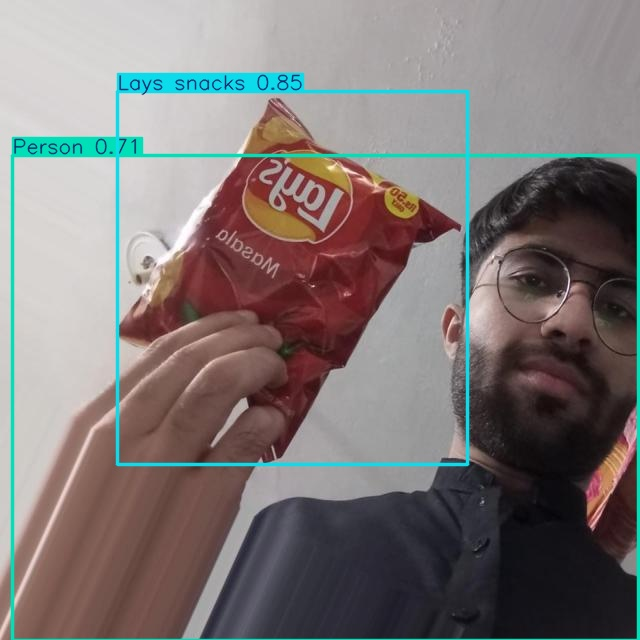

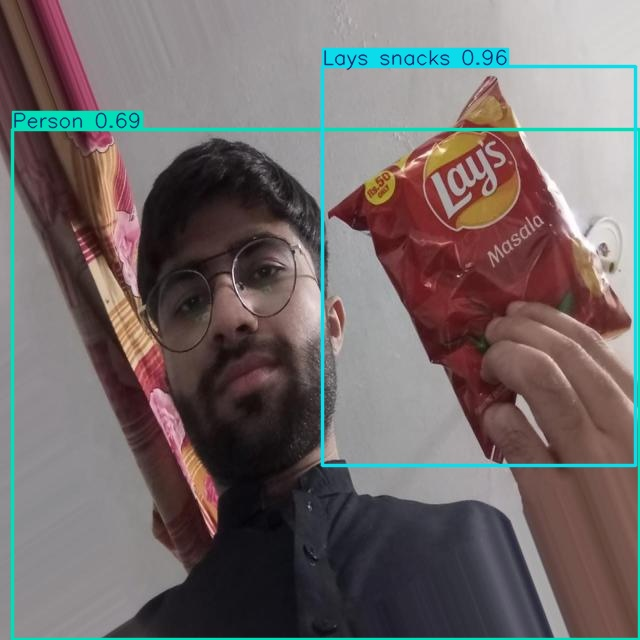

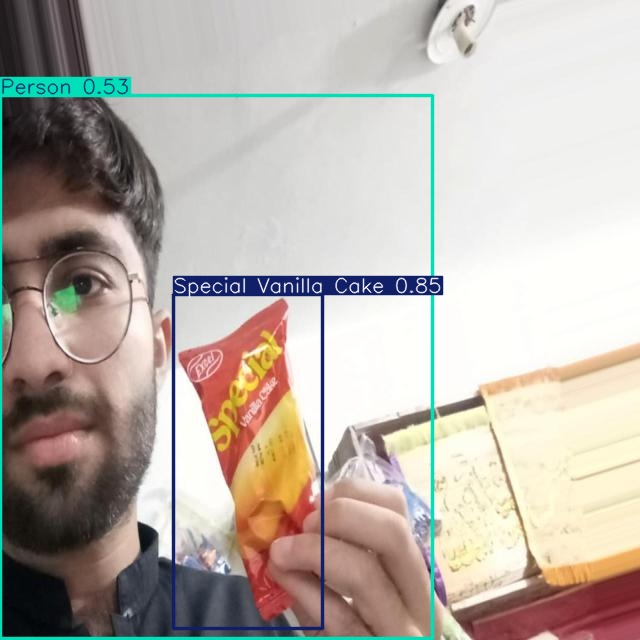

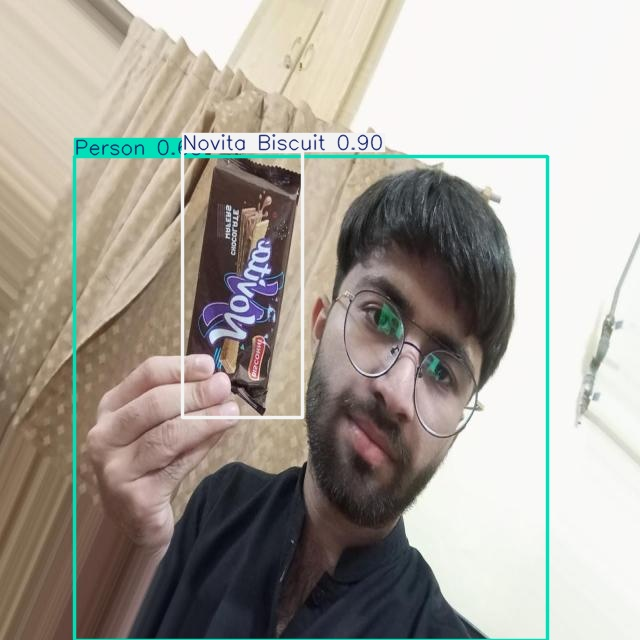

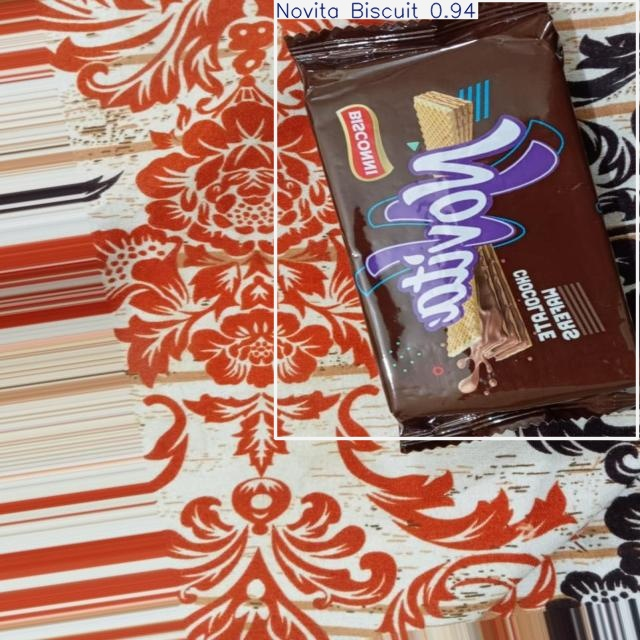

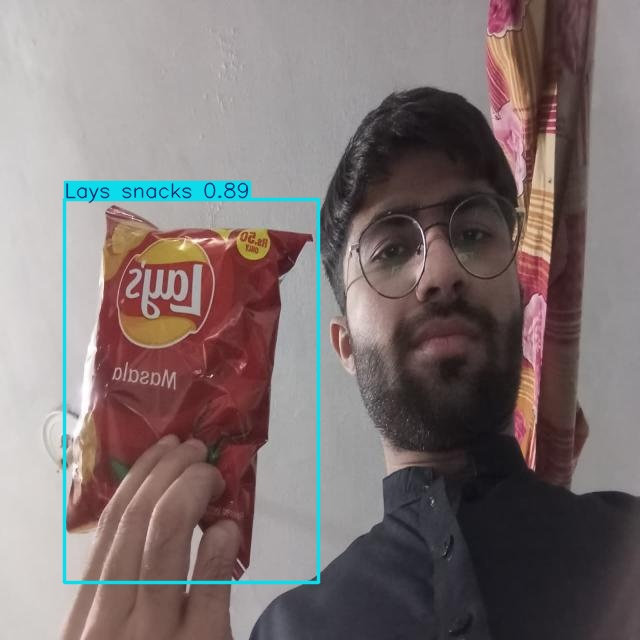

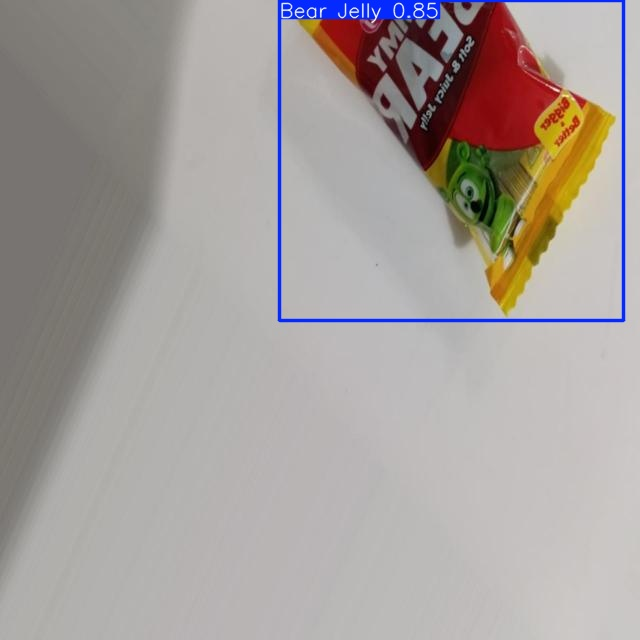

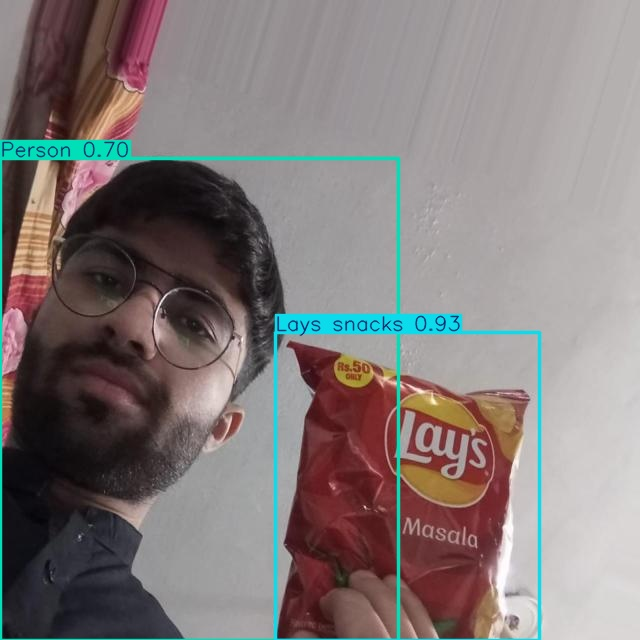

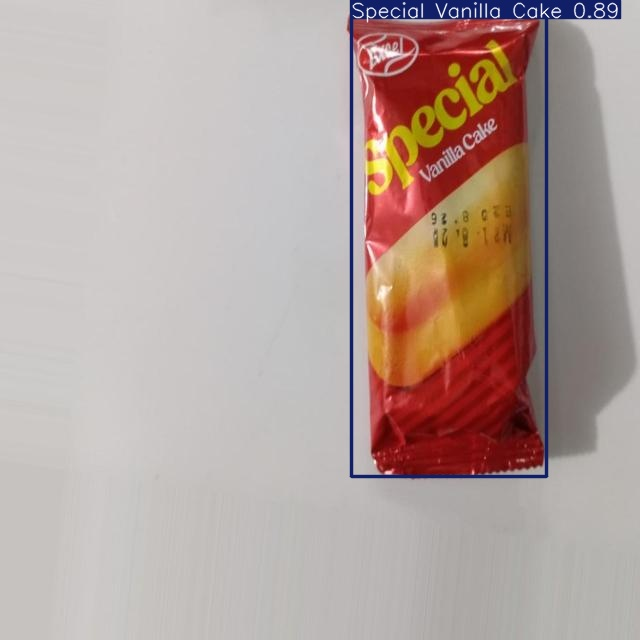

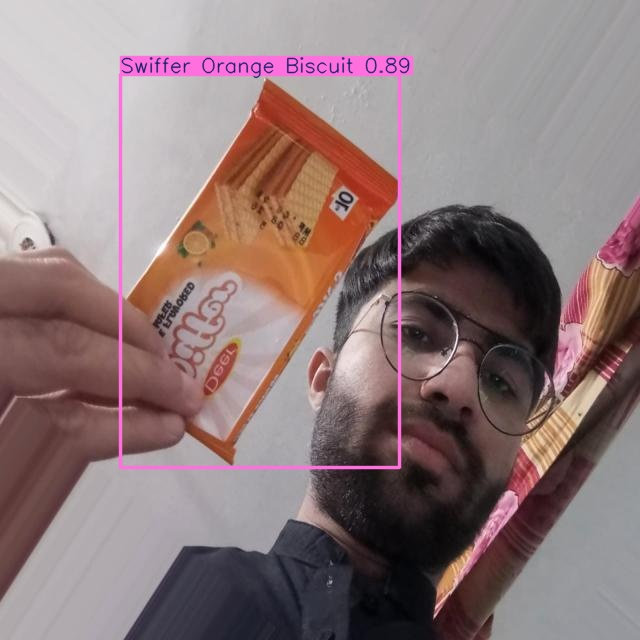

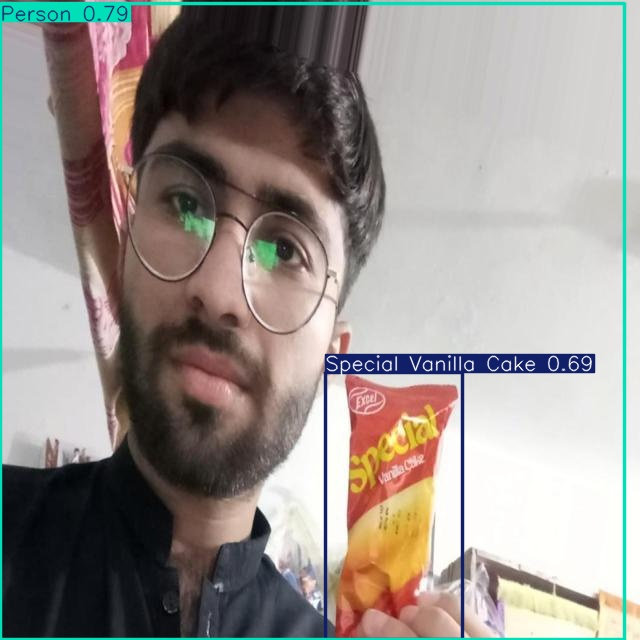

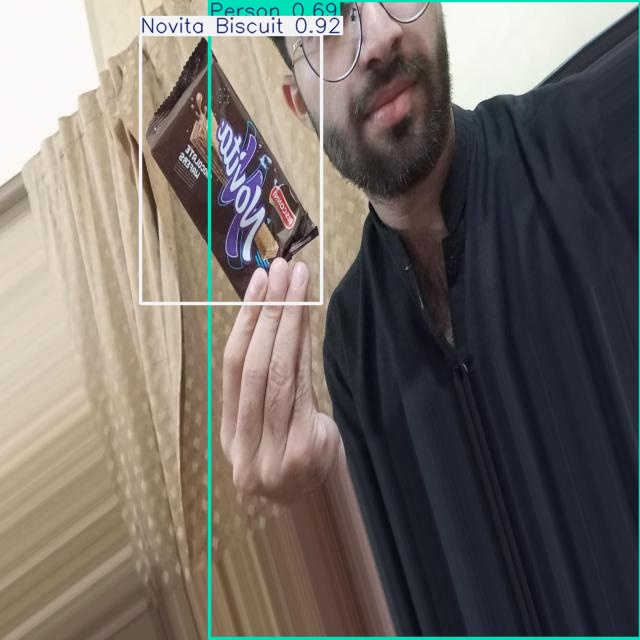

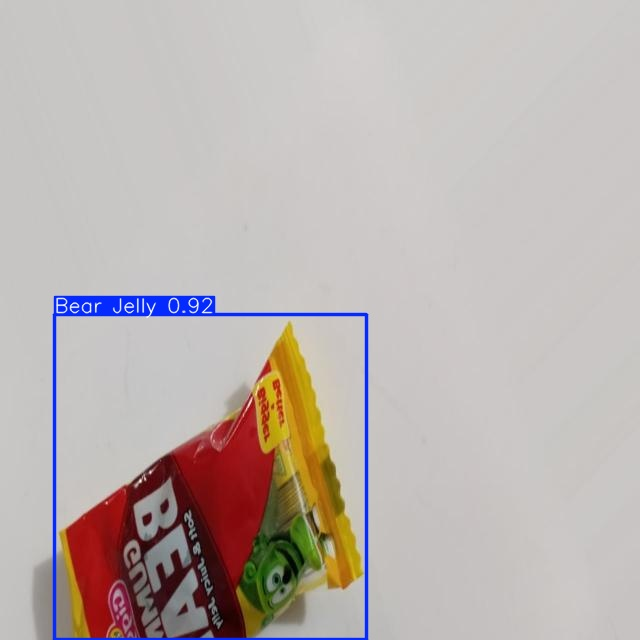

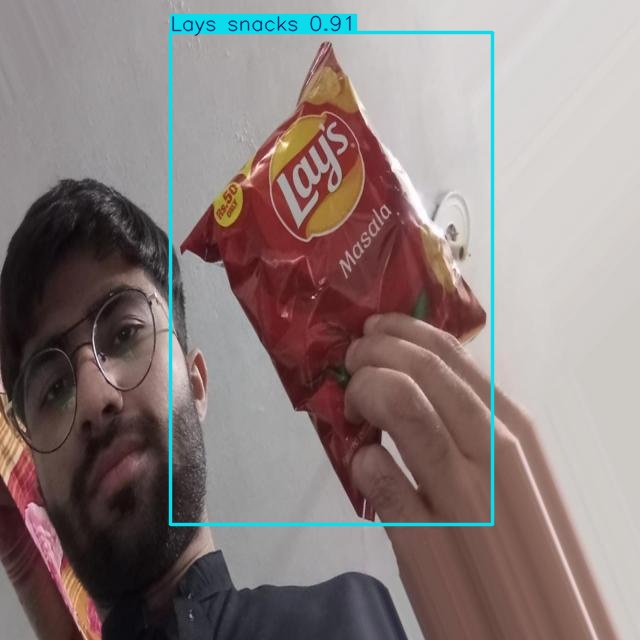

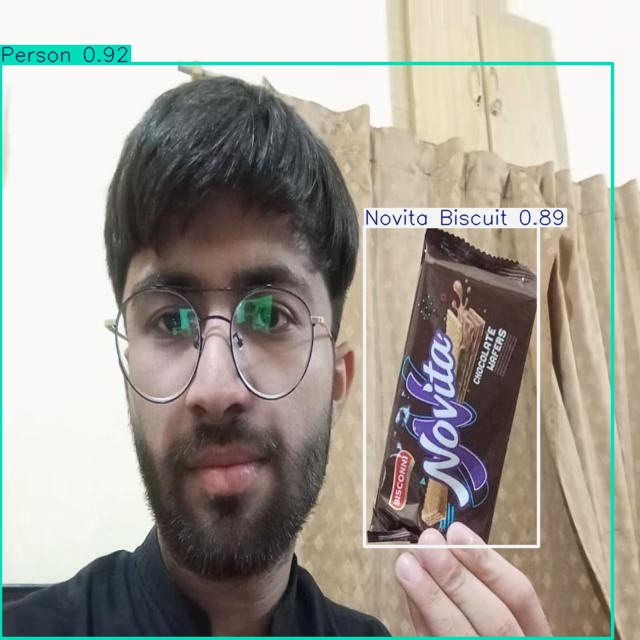

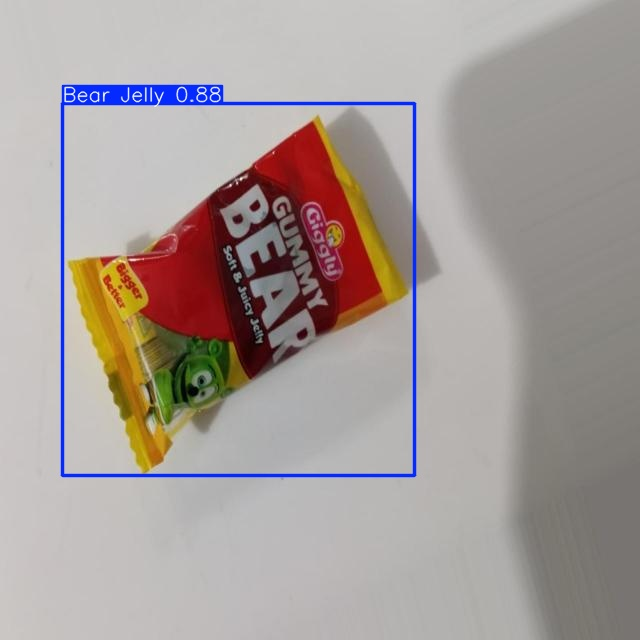

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")